#  Description

# # 1. Database Description

1.1. Introduction
This database is composed of 1951 multivariate time-series acquired by sensors on a SpectraQuest's Machinery Fault Simulator (MFS) Alignment-Balance-Vibration (ABVT). The 1951 comprises six different simulated states: normal function, imbalance fault, horizontal and vertical misalignment faults and, inner and outer bearing faults. This section describes the database.

The database is composed by several CSV (Comma-Separated Values) files, each one with 8 columns, one column for each sensor, according to:

column 1 -->
tachometer signal that allows to estimate rotation frequency;

columns 2 to 4 -->
underhang bearing accelerometer (axial, radiale tangential direction);

columns 5 to 7 -->
overhang bearing accelerometer (axial, radiale tangential direction);

column 8 -->
microphone.

[Link to the DateSet HomePage, Click Here.](http://www02.smt.ufrj.br/~offshore/mfs/page_01.html)

#  Loading DataSet

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob 
import statsmodels
import time

In [2]:
cur_path = r"C:\Users\HP\Downloads\MAFAULDA\DATASET"

#save all files path present in that folder into a file
normal_file_names = glob.glob(cur_path +'/normal/*.csv')
imnormal_file_names_6g = glob.glob(cur_path+'/imbalance/6g/*.csv')
imnormal_file_names_10g = glob.glob(cur_path+'/imbalance/10g/*.csv')
imnormal_file_names_15g = glob.glob(cur_path+'/imbalance/15g/*.csv')
imnormal_file_names_20g = glob.glob(cur_path+'/imbalance/20g/*.csv')
imnormal_file_names_25g = glob.glob(cur_path+'/imbalance/25g/*.csv')
imnormal_file_names_30g = glob.glob(cur_path+'/imbalance/30g/*.csv')

In [3]:
normal_file_names[:2]

['C:\\Users\\HP\\Downloads\\MAFAULDA\\DATASET/normal\\12.288..csv',
 'C:\\Users\\HP\\Downloads\\MAFAULDA\\DATASET/normal\\13.1072.csv']

In [4]:
imnormal_file_names_6g[:2]

['C:\\Users\\HP\\Downloads\\MAFAULDA\\DATASET/imbalance/6g\\13.9264.csv',
 'C:\\Users\\HP\\Downloads\\MAFAULDA\\DATASET/imbalance/6g\\14.336.csv']

In [5]:
colnames = ['rpm','uh_a','uh_r','Uh_t','oh_a','oh_r','oh_t','sound']

#append all the files into one
def dataReader(path_names):
    data_n = pd.DataFrame()
    for i in path_names:
        low_data = pd.read_csv(i,header= None,names=colnames)
        data_n = pd.concat([data_n,low_data],ignore_index=True)
    return data_n

In [6]:
toc = time.time()

data_n = dataReader(normal_file_names)
data_6g = dataReader(imnormal_file_names_6g)
data_10g = dataReader(imnormal_file_names_10g)
data_15g = dataReader(imnormal_file_names_15g)
data_20g = dataReader(imnormal_file_names_20g)
data_25g = dataReader(imnormal_file_names_25g)
data_30g = dataReader(imnormal_file_names_30g)

tic = time.time()
print('execution time ',(tic - toc)*1000,'ms')

execution time  307786.7465019226 ms


In [7]:
data_n.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12250000 entries, 0 to 12249999
Data columns (total 8 columns):
 #   Column  Dtype  
---  ------  -----  
 0   rpm     float64
 1   uh_a    float64
 2   uh_r    float64
 3   Uh_t    float64
 4   oh_a    float64
 5   oh_r    float64
 6   oh_t    float64
 7   sound   float64
dtypes: float64(8)
memory usage: 747.7 MB


In [8]:
data_n.head()

rpm      uh_a      uh_r      Uh_t     oh_a      oh_r     oh_t     sound
0  4.5595  0.175200  0.287210 -0.017751 -0.41565  0.032459 -0.11218 -0.128140
1  4.6038 -0.051295 -0.194050 -0.060071 -0.41809  0.036547 -0.11043  0.118310
2  4.5703 -0.969080  0.038033 -0.028329 -0.43081  0.041924 -0.14331 -0.071527
3  4.5870  0.891270  0.072973  0.007453 -0.40017  0.041090 -0.11984  0.043445
4  4.5887 -1.716000 -0.329290 -0.033063 -0.50281  0.040474 -0.25270  0.023901

# Data Sampling

In [9]:
def downSampler(data,a,b):
    """
    data = data
    a = start index
    b = sampling rate
    """
    data_decreased = pd.DataFrame()
    x = b
    for i in range(int(len(data)/x)):
        data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
        a += x
        b += x
    return data_decreased

In [10]:
data_n = downSampler(data_n, 0, 5000)
data_6g = downSampler(data_6g, 0, 5000)
data_10g = downSampler(data_10g, 0, 5000)
data_15g = downSampler(data_15g, 0, 5000)
data_20g = downSampler(data_20g, 0, 5000)
data_25g = downSampler(data_25g, 0, 5000)
data_30g = downSampler(data_30g, 0, 5000)

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6956\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

In [11]:
data_n.describe()

rpm         uh_a         uh_r         Uh_t         oh_a  \
count  2450.000000  2450.000000  2450.000000  2450.000000  2450.000000   
mean      0.000157     0.007892    -0.000466     0.000373     0.014837   
std       0.087981     0.020933     0.007791     0.002300     0.431467   
min      -0.270002    -0.110925    -0.023872    -0.006576    -1.790029   
25%      -0.052851    -0.003769    -0.005519    -0.000975    -0.176750   
50%       0.000740     0.006625    -0.000531     0.000343     0.020716   
75%       0.048093     0.017605     0.004784     0.001750     0.209201   
max       0.379215     0.138848     0.023753     0.007436     2.133327   

              oh_r         oh_t        sound  
count  2450.000000  2450.000000  2450.000000  
mean      0.003021     0.018774     0.012278  
std       0.013938     0.294291     0.003197  
min      -0.097399    -1.692283    -0.010445  
25%      -0.001365    -0.147834     0.010694  
50%       0.002898     0.023486     0.012157  
75%       0.007100     0.184953     0.013550  
max       0.121705     1.527537     0.040879

# Data Visualization

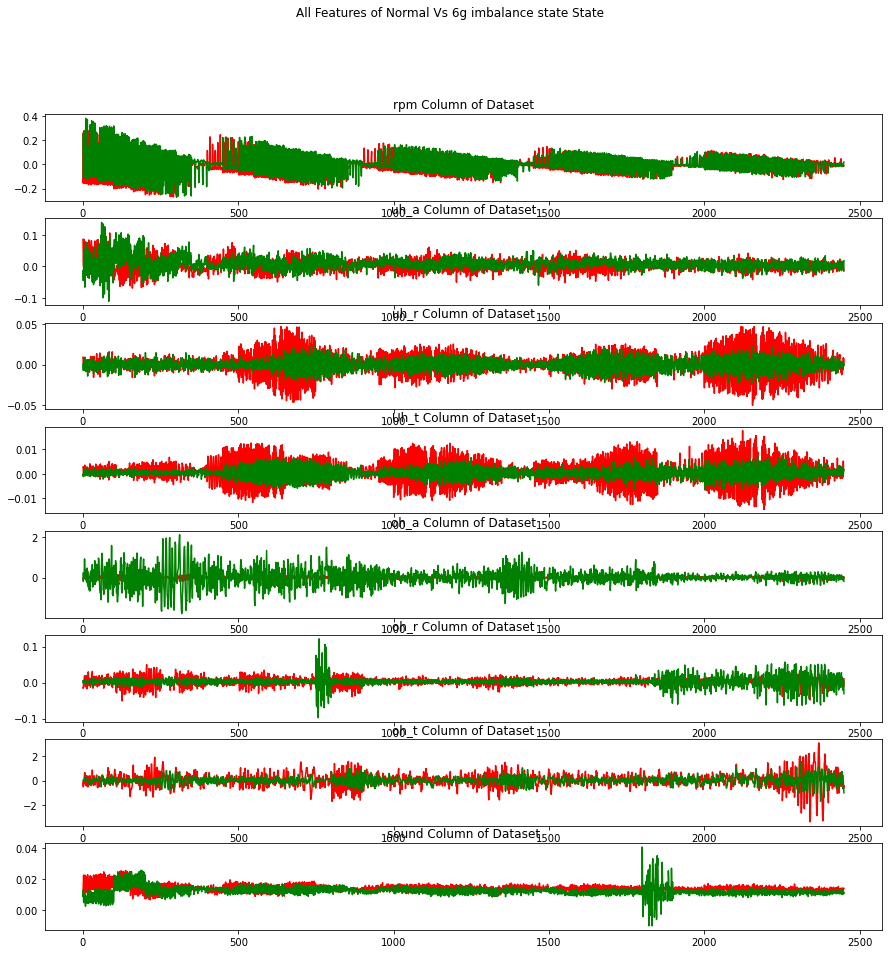

In [12]:
fig, axs = plt.subplots(8, sharex=False, sharey=False,figsize=(15,15))
fig.suptitle('All Features of Normal Vs 6g imbalance state State')
j = 0
for i in data_n.columns:
    axs[j].plot(data_6g[i],'r')
    axs[j].plot(data_n[i],'g')
    axs[j].set_title('{} Column of Dataset'.format(i))
    
    #axs[j].set_title('{} Column of imbalance State'.format(i))
    j += 1

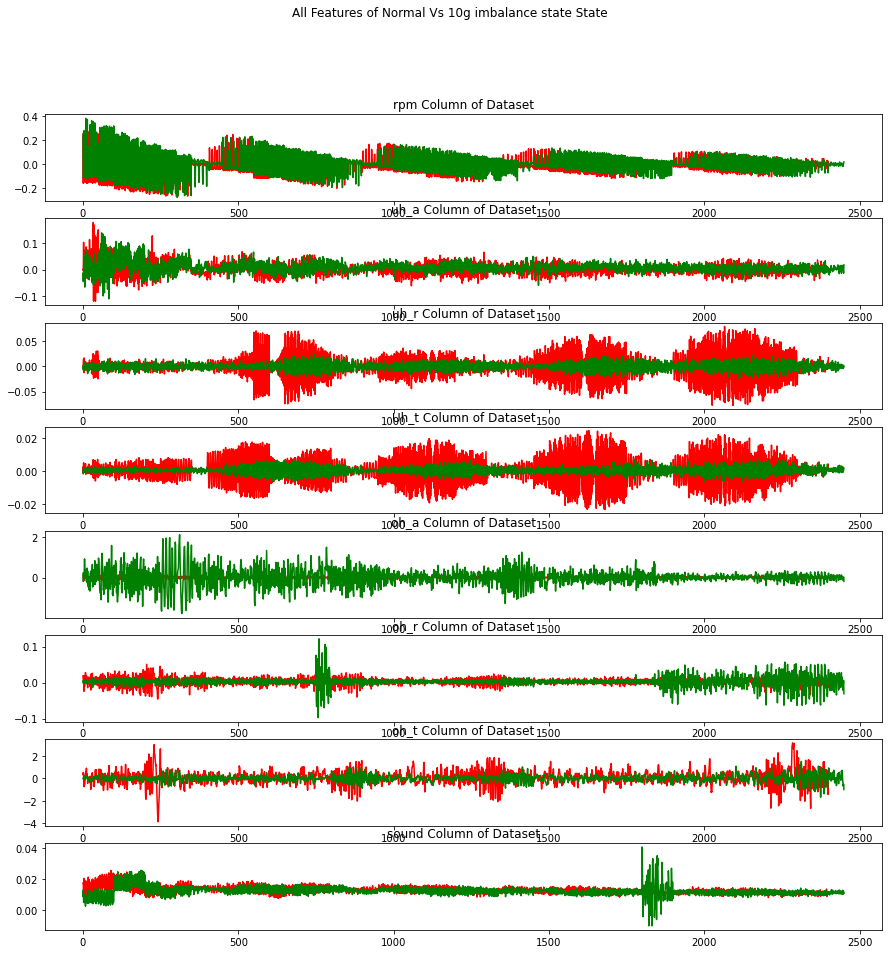

In [13]:
fig, axs = plt.subplots(8, sharex=False, sharey=False,figsize=(15,15))
fig.suptitle('All Features of Normal Vs 10g imbalance state State')
j = 0
for i in data_n.columns:
    axs[j].plot(data_10g[i],'r')
    axs[j].plot(data_n[i],'g')
    axs[j].set_title('{} Column of Dataset'.format(i))
    
    #axs[j].set_title('{} Column of imbalance State'.format(i))
    j += 1

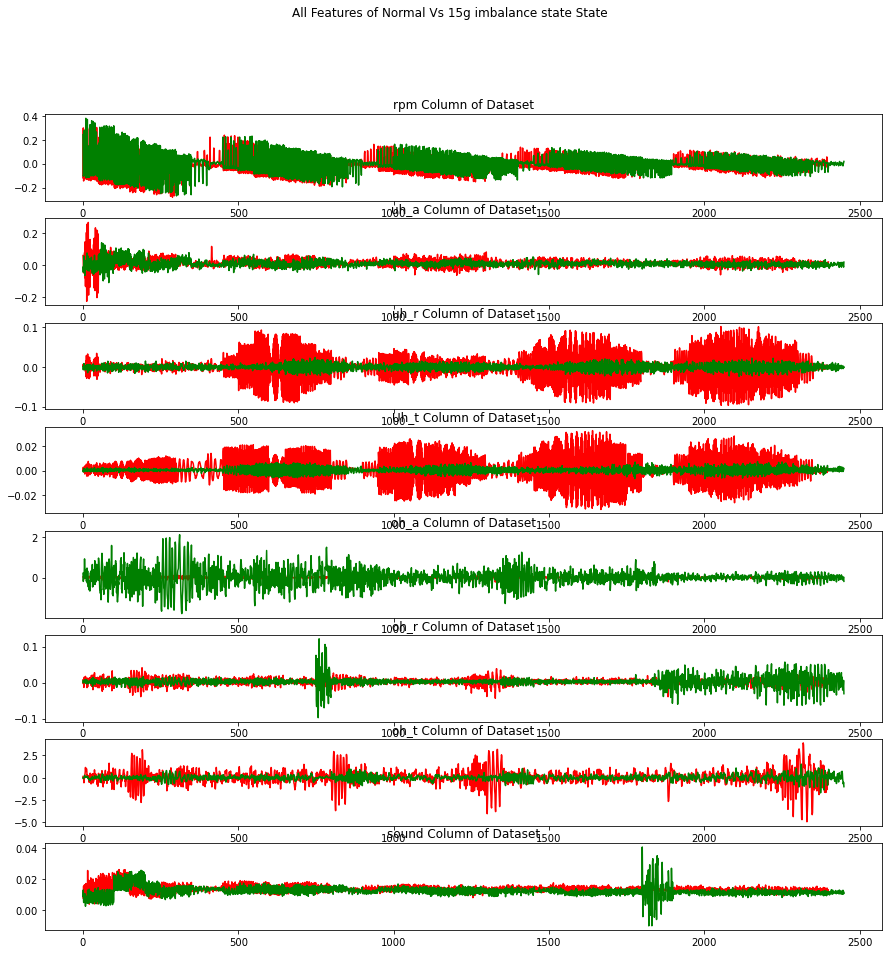

In [14]:
fig, axs = plt.subplots(8, sharex=False, sharey=False,figsize=(15,15))
fig.suptitle('All Features of Normal Vs 15g imbalance state State')
j = 0
for i in data_n.columns:
    axs[j].plot(data_15g[i],'r')
    axs[j].plot(data_n[i],'g')
    axs[j].set_title('{} Column of Dataset'.format(i))
    
    #axs[j].set_title('{} Column of imbalance State'.format(i))
    j += 1

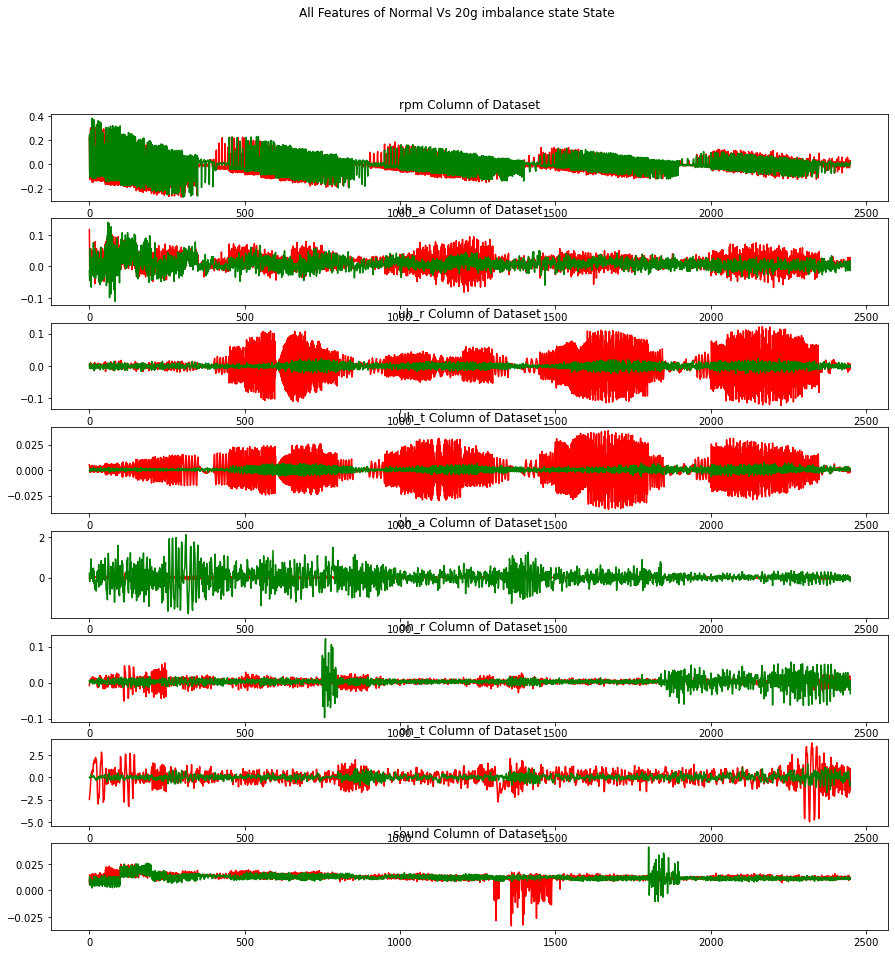

In [15]:
fig, axs = plt.subplots(8, sharex=False, sharey=False,figsize=(15,15))
fig.suptitle('All Features of Normal Vs 20g imbalance state State')
j = 0
for i in data_n.columns:
    axs[j].plot(data_20g[i],'r')
    axs[j].plot(data_n[i],'g')
    axs[j].set_title('{} Column of Dataset'.format(i))
    
    #axs[j].set_title('{} Column of imbalance State'.format(i))
    j += 1

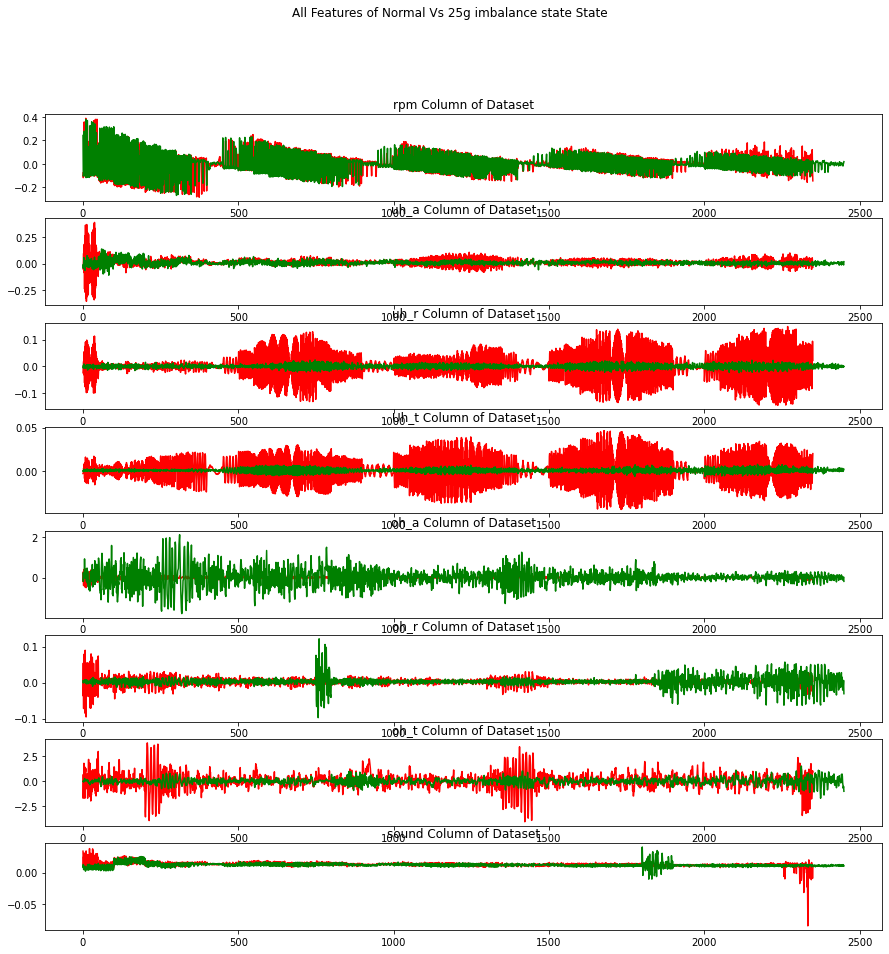

In [16]:
fig, axs = plt.subplots(8, sharex=False, sharey=False,figsize=(15,15))
fig.suptitle('All Features of Normal Vs 25g imbalance state State')
j = 0
for i in data_n.columns:
    axs[j].plot(data_25g[i],'r')
    axs[j].plot(data_n[i],'g')
    axs[j].set_title('{} Column of Dataset'.format(i))
    
    #axs[j].set_title('{} Column of imbalance State'.format(i))
    j += 1

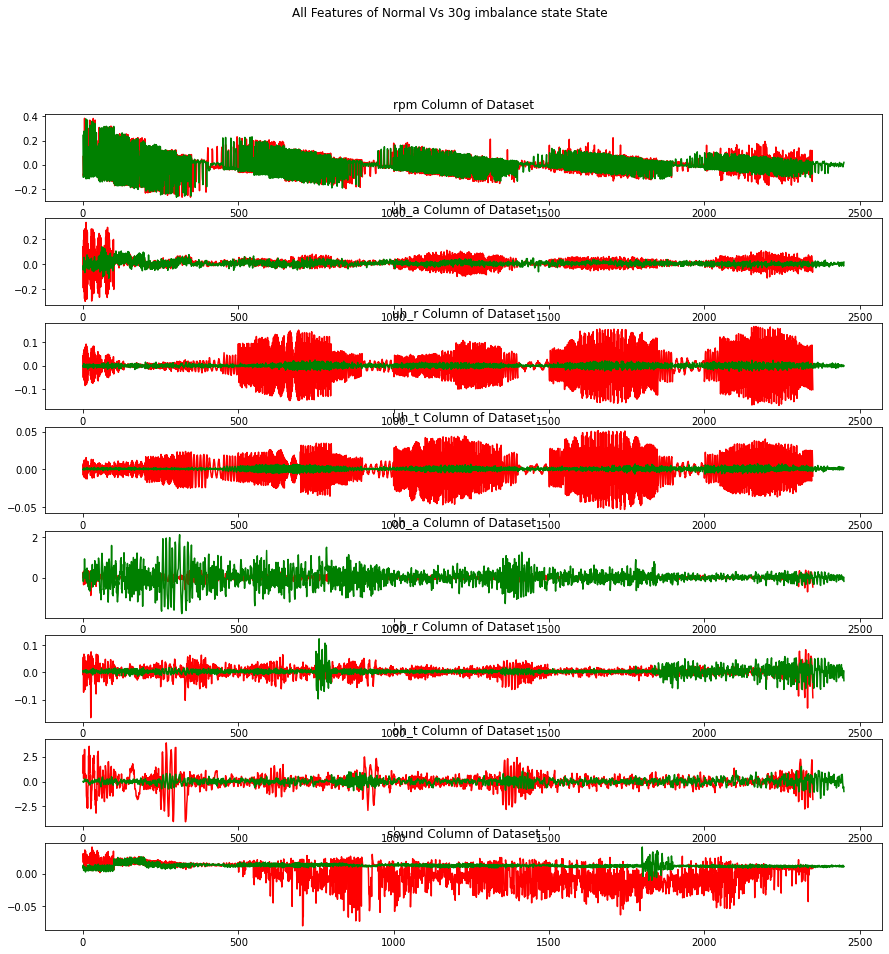

In [17]:
fig, axs = plt.subplots(8, sharex=False, sharey=False,figsize=(15,15))
fig.suptitle('All Features of Normal Vs 30g imbalance state State')
j = 0
for i in data_n.columns:
    axs[j].plot(data_30g[i],'r')
    axs[j].plot(data_n[i],'g')
    axs[j].set_title('{} Column of Dataset'.format(i))
    
    #axs[j].set_title('{} Column of imbalance State'.format(i))
    j += 1

# Data Preprocessing & Transformation from time domain to frequency domain

In [18]:
from scipy import signal
def FFT(data):
    autocorr = signal.fftconvolve(data,data[::-1],mode='full')
    return pd.DataFrame(autocorr)

In [19]:
data_n = FFT(data_n)
data_6g = FFT(data_6g)
data_10g = FFT(data_10g)
data_15g = FFT(data_15g)
data_20g = FFT(data_20g)
data_25g = FFT(data_25g)
data_30g = FFT(data_30g)

# Data Scaling

In [20]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
data_n  = pd.DataFrame(mms.fit_transform(data_n)) 
data_6g = pd.DataFrame(mms.fit_transform(data_6g)) 
data_10g= pd.DataFrame(mms.fit_transform(data_10g)) 
data_15g= pd.DataFrame(mms.fit_transform(data_15g)) 
data_20g= pd.DataFrame(mms.fit_transform(data_20g)) 
data_25g= pd.DataFrame(mms.fit_transform(data_25g)) 
data_30g= pd.DataFrame(mms.fit_transform(data_30g)) 

In [21]:
data_n.describe()

0            1            2            3            4   \
count  4899.000000  4899.000000  4899.000000  4899.000000  4899.000000   
mean      0.341063     0.476551     0.182839     0.453917     0.476042   
std       0.018025     0.074431     0.030320     0.095756     0.106865   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.336137     0.444353     0.161747     0.403759     0.418089   
50%       0.341119     0.476422     0.178830     0.464902     0.476572   
75%       0.345937     0.508306     0.198040     0.510231     0.532672   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                5            6            7            8            9   \
count  4899.000000  4899.000000  4899.000000  4899.000000  4899.000000   
mean      0.446684     0.492089     0.466087     0.174403     0.198613   
std       0.130690     0.135309     0.153084     0.022975     0.031244   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.360435     0.405693     0.353284     0.167818     0.182177   
50%       0.420348     0.489761     0.457040     0.173941     0.197423   
75%       0.513939     0.578185     0.565032     0.180394     0.215201   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                10           11           12           13           14  
count  4899.000000  4899.000000  4899.000000  4899.000000  4899.000000  
mean      0.166684     0.109009     0.123061     0.480036     0.468238  
std       0.026401     0.044989     0.024570     0.230137     0.275241  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.153393     0.074527     0.112759     0.335751     0.229083  
50%       0.166496     0.106285     0.122242     0.483058     0.467169  
75%       0.179322     0.136058     0.132627     0.628301     0.705975  
max       1.000000     1.000000     1.000000     1.000000     1.000000

In [22]:
data_n.head()

0         1         2         3         4         5         6   \
0  0.341220  0.477240  0.153371  0.505321  0.471857  0.358174  0.447817   
1  0.341046  0.470313  0.153461  0.502306  0.476958  0.360435  0.482080   
2  0.340955  0.473742  0.153383  0.501459  0.474734  0.359152  0.481510   
3  0.340836  0.475038  0.154242  0.502696  0.475010  0.357555  0.500929   
4  0.341276  0.481444  0.153307  0.509009  0.470418  0.360434  0.462240   

         7         8         9         10        11        12        13  \
0  0.283227  0.173446  0.189982  0.164631  0.052156  0.120884  0.009997   
1  0.302362  0.173607  0.191135  0.165288  0.052306  0.120882  0.002903   
2  0.291881  0.173498  0.190282  0.165086  0.052087  0.121204  0.001994   
3  0.265949  0.173435  0.189795  0.164797  0.051989  0.121110  0.000000   
4  0.288682  0.173426  0.189708  0.164381  0.051573  0.120797  0.001865   

         14  
0  0.000000  
1  0.000375  
2  0.000512  
3  0.000658  
4  0.000866

In [23]:
y_1 = pd.DataFrame(np.ones(int(len(data_n)),dtype=int))
y_2 = pd.DataFrame(np.zeros(int(len(data_6g)),dtype=int))
y_3 = pd.DataFrame(np.full((int(len(data_10g)),1),2))
y_4 = pd.DataFrame(np.full((int(len(data_15g)),1),3))
y_5 = pd.DataFrame(np.full((int(len(data_20g)),1),4))
y_6 = pd.DataFrame(np.full((int(len(data_25g)),1),5))
y_7 = pd.DataFrame(np.full((int(len(data_30g)),1),6))
y = pd.concat([y_1,y_2,y_3,y_4,y_5,y_6,y_7], ignore_index=True)
y.shape

(33693, 1)

In [24]:
data = pd.concat([data_n,data_6g,data_10g,data_15g,data_20g,data_25g,data_30g],ignore_index=True)
data.shape

(33693, 15)

# Data Splitting

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.25,shuffle=True)

In [26]:
print("Shape of Train Data : {}".format(X_train.shape))
print("Shape of Test Data : {}".format(X_test.shape))

Shape of Train Data : (25269, 15)
Shape of Test Data : (8424, 15)


# SVM Classifire

In [27]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train,y_train)
print("SVM accuracy is {} on Train Dataset".format(svm.score(X_train,y_train)))
print("SVM accuracy is {} on Test Dataset".format(svm.score(X_test,y_test)))

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM accuracy is 0.9966757687284815 on Train Dataset
SVM accuracy is 0.9969135802469136 on Test Dataset


In [28]:
from sklearn.metrics import classification_report, confusion_matrix
predictions = svm.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1218
           1       1.00      1.00      1.00      1215
           2       1.00      1.00      1.00      1207
           3       0.99      0.99      0.99      1170
           4       1.00      0.99      1.00      1199
           5       1.00      1.00      1.00      1203
           6       1.00      1.00      1.00      1212

    accuracy                           1.00      8424
   macro avg       1.00      1.00      1.00      8424
weighted avg       1.00      1.00      1.00      8424



# KNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3, weights = 'distance' )
knn.fit(X_train,y_train)
print("k={}NN Accuracy on Train Data: {}".format(3,knn.score(X_train,y_train)))
print("k={}NN Accuracy on Test Data: {}".format(3,knn.score(X_test,y_test)))

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k=3NN Accuracy on Train Data: 1.0
k=3NN Accuracy on Test Data: 0.9982193732193733


# Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)
classifier_rf.fit(X_train,y_train)
print("Random Forest Accuracy on Train Data: {}".format(classifier_rf.score(X_train,y_train)))
print("Random Forest Accuracy on Test Data: {}".format(classifier_rf.score(X_test,y_test)))

C:\Users\HP\AppData\Local\Temp\ipykernel_6956\791342403.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier_rf.fit(X_train,y_train)


Random Forest Accuracy on Train Data: 0.9731291305552258
Random Forest Accuracy on Test Data: 0.9721035137701804
